#####  TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type  
##### 가 발생하는 경우가 있습니다. 이것은 pandas 버전과 numpy의 버전이 맞지않은 경우에 발생합니다.
##### 위의 에러가 발생하는 경우에는, 
* (1) pip 버전 업그레이드 : (anaconda prompt "관리자권한 실행" 후) python.exe -m pip install --upgrade pip
* (2) pandas 버전 업그레이드 : (Jupyter Notebook "관리자권한 실행" 후) !pip install pandas --upgrade
* (3) numpy 버전 업그레이드 :  (Jupyter Notebook "관리자권한 실행" 후) !pip install numpy --upgrade
##### 를 하시기 바랍니다.

In [2]:
#경고 알림 무시
import warnings
warnings.filterwarnings(action='ignore')

# 1. 통계분석
## [2] 상관분석 + 히트맵 : 타이타닉 생존율 분석하기

In [5]:
import seaborn as sns
import pandas as pd

In [7]:
titanic = sns.load_dataset("titanic")

In [9]:
#타이타닉호 승객 변수를 분석하여 생존율과의 상관관계를 찾는 것이 목표
titanic.to_csv('titanic.csv', index = False)

### 1. 데이터 준비
결측값이 있는지 확인하기

In [101]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
# age열의 결측값의 중앙값으로 치환하기
# fillna 메서드는 DataFrame에서 결측값을 원하는 값으로 변경하는 메서드
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

##### fillna 메서드 기본 사용법
- df.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
- value : 결측값을 대체할 값입니다. dict형태로도 가능합니다.
- method : 결측값을 변경할 방식입니다. bfill로 할경우 결측값을 바로 아래 값과 동일하게 변경합니다.
- ffill로 할 경우 결측값을 바로 위 값과 동일하게 변경합니다.
- axis : {0 : index / 1 : columns} fillna 메서드를 적용할 레이블입니다.
- inplace : 원본을 변경할지 여부입니다. True일 경우 원본을 변경하게 됩니다.
- limit : 결측값을 변경할 횟수입니다. 위에서부터 limit로 지정된 갯수만큼만 변경합니다.
- downcast : 다운캐스트할지 여부입니다. downcast='infer'일 경우 float64를 int64로 변경합니다.

In [22]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
# embarked 열의 결측값을 최빈값으로 치환하기
titanic['embarked'] = titanic['embarked'].fillna('S')

In [26]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [28]:
#embark_town열의 결측값을 최빈값으로 치환하기
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [30]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [34]:
# deck 열의 결측값을 최빈값으로 치환하기
titanic['deck'] = titanic['deck'].fillna('C')

In [38]:
#결측치가 다 채워졌는지 확인하기
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### 2. 데이터 탐색
#### 2.1 데이터의 기본 정보 탐색하기

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- sibsp : 함께 탑승한 형제자매 혹은 배우자 수
- parch : 함께 답승한 부모/자식 수
- embarke : 탑승 항구

In [44]:
#1(생존), 0(사망)
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

#### 2.2 차트를 그려 데이터를 시각적으로 탐색하기

In [50]:
import matplotlib.pyplot as plt

In [52]:
#성별이 'male(남자)'인 사람의 생존 여부
value = titanic['survived'][titanic['sex'] == 'male'].value_counts()
value

survived
0    468
1    109
Name: count, dtype: int64

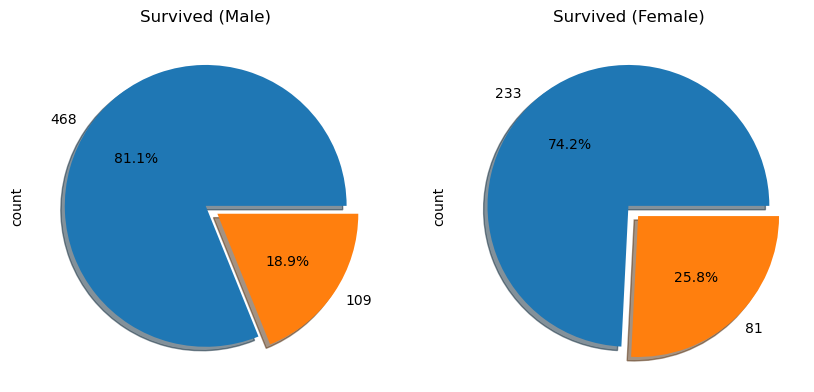

In [58]:
# 1행 2열의 서브 플롯 생성
f,ax = plt.subplots(1, 2, figsize = (10, 5))

#성별이 '남자'인 사람들의 생존 확률
value = titanic['survived'][titanic['sex'] == 'male'].value_counts()
value.plot.pie(explode = [0,0.1], autopct = '%1.1f%%', labels=value, ax = ax[0], shadow = True)

#성별이 '여자'인 사람들의 생존 확률
value = titanic['survived'][titanic['sex'] == 'female'].value_counts()
value.plot.pie(explode = [0,0.1], autopct = '%1.1f%%', labels=value, ax = ax[1], shadow = True)

ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

# 1(생존), 0(사망)
# explode : 파이차트에서 조각이 떨어진 정도
# autopct : 부채꼴 안에 표시될 숫자의 형식을 지정

#### 2.3 등급별 생존자 수를 차트로 나타내기

<Axes: xlabel='class', ylabel='count'>

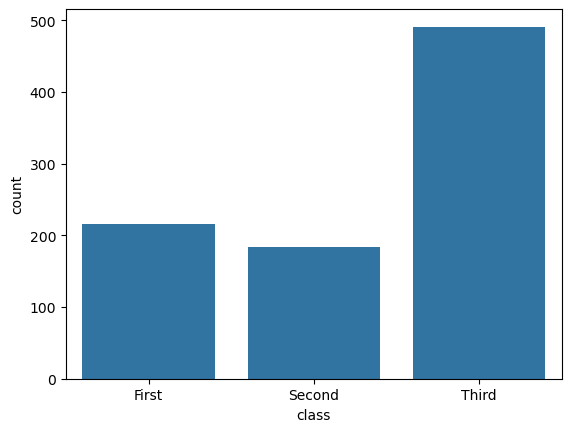

In [66]:
sns.countplot(titanic, x="class")

### 3. 데이터 모델링
#### 3.1 상관분석을 위한 상관계수를 구하고 저장하기

In [116]:
titanic_corr = titanic.corr(method = 'pearson', numeric_only=True)
# method = 'pearson' : 피어슨 상관계수(Pearson correlation coefficient)를 계산하는 방법

titanic_corr

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,age2,family
survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367,-0.052184,0.016639
pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207,-0.339368,0.065997
sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.908578,0.303646,0.074415,-0.200988
age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647,0.975345,-0.245619
sibsp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471,-0.227286,0.890712
parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398,-0.158476,0.783111
fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.100123,0.217138
adult_male,-0.557080,0.094035,0.908578,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744,0.223350,-0.348143
alone,-0.203367,0.135207,0.303646,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000,0.155459,-0.690922
age2,-0.052184,-0.339368,0.074415,0.975345,-0.227286,-0.158476,0.100123,0.223350,0.155459,1.000000,-0.234514


#### .corr()
- pandas 데이터프레임에서 상관 계수를 계산하는 데 사용되는 메서드
- 데이터프레임의 열 간의 상관 관계를 측정하여, 어떤 변수들이 서로 어떻게 연관되어 있는지를 파악하는 데 유용


#### 주요 기능
- 상관 계수 계산: 기본적으로 피어슨 상관 계수를 계산
- 이는 두 변수 간의 선형 관계를 나타내는 값으로, -1에서 1 사이의 범위를 가짐
    - 1: 완전한 양의 상관관계
    - -1: 완전한 음의 상관관계
    - 0: 상관관계 없음

#### 3.2 상관계수 확인하기
저장한 titanic_corr.csv 파일을 열어본다.

In [73]:
titanic_corr.to_csv('titanic_corr.csv', index = False)

#### 3.3 특정 변수 사이의 상관계수 구하기

In [79]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

In [81]:
titanic['survived'].corr(titanic['fare'])

0.25730652238496227

### 4. 결과 시각화
#### 4.1 산점도로 상관 분석 시각화 하기

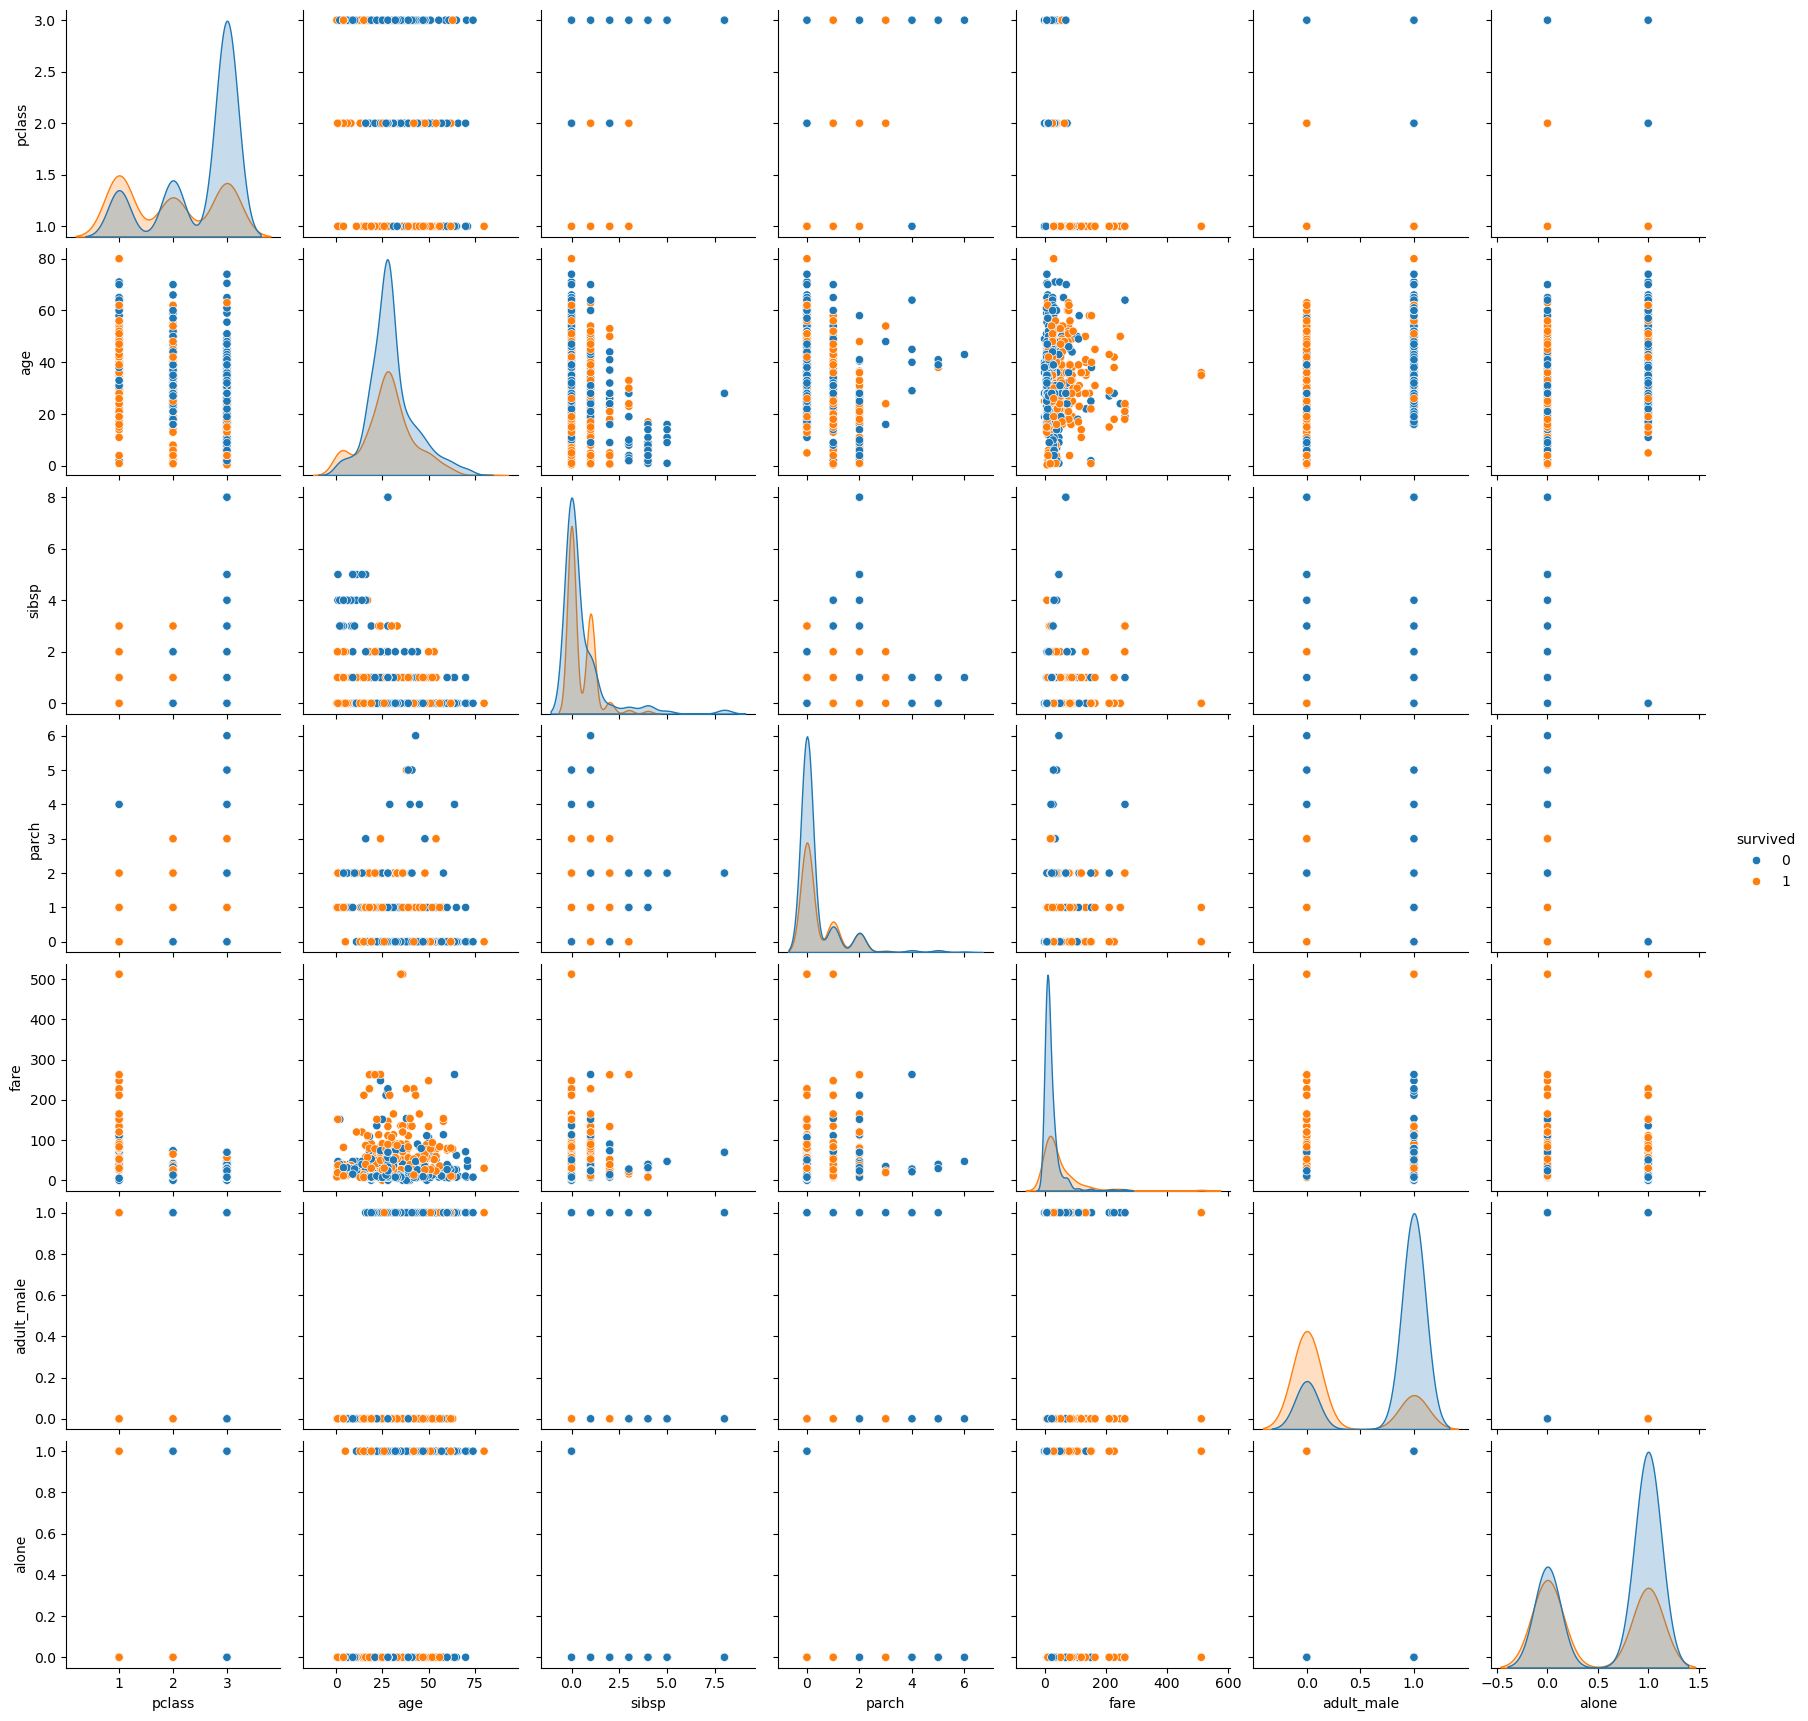

In [95]:
# 데이터프레임의 모든 변수 쌍에 대한 산점도(scatter plot)와 각 변수의 분포를 시각화하는 데 사용
sns.pairplot(titanic, hue = 'survived')

plt.show()

#### 4.2 두 변수의 상관관계 시각화 하기
- 객실 등급과 생존의 상관관계를 seaborn 패키지의 catplot으로 시각화해보자

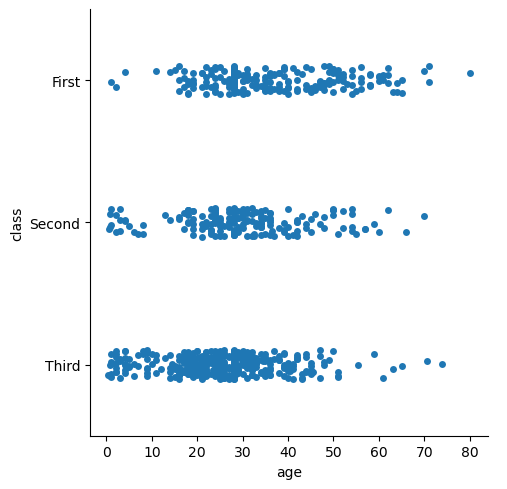

In [99]:
#객실 등급과 나이의 상관관계 
sns.catplot(data=titanic, x="age", y="class")

# 범주형 변수와 연속형 변수 간의 관계를 시각화하는 데 사용
# kind 인자를 통해 바 차트(kind='bar'), 점 차트(kind='strip'), 박스 플롯(kind='box') 등 여러 가지 형식으로 시각화
# 지금처럼 지정되지 않은 경우, 점차트로 그려짐

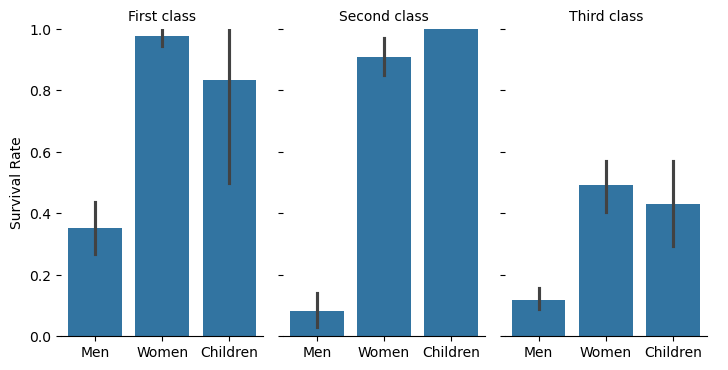

In [103]:
# Seaborn의 catplot 함수를 사용하여 데이터 시각화를 수행
g = sns.catplot(
    data=titanic,              # 분석할 데이터프레임
    x="who",                   # x축에 사용할 변수: 누가 승객인지 (남성, 여성, 어린이)
    y="survived",              # y축에 사용할 변수: 생존 여부 (0 또는 1)
    col="class",               # 열로 구분할 변수: 승객 클래스 (1등석, 2등석, 3등석)
                               # 서브 플롯이 col = "class"에서 지정됨
    kind="bar",                # 바 차트 형식으로 시각화
    height=4,                  # 각 서브플롯의 높이
    aspect=.6                  # 서브플롯의 가로 세로 비율
)

# y축 라벨 설정
g.set_axis_labels("", "Survival Rate")

# x축의 레이블을 설정 (Men, Women, Children)
g.set_xticklabels(["Men", "Women", "Children"])

# 각 서브플롯의 제목 형식을 설정
g.set_titles("{col_name} {col_var}")

# y축의 범위를 0에서 1로 설정 (생존율이 0%에서 100% 사이임을 나타냄)
g.set(ylim=(0, 1))

# 왼쪽 여백을 제거하여 시각적 깔끔함을 높임
g.despine(left=True)


#### 4.3 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [107]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [109]:
# 나이 카테고리화
titanic['age2'] = titanic['age'].apply(category_age)

# 성별 숫자 치환
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

# 가족의 규모
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

# titanic['sibsp']: 이 열은 각 승객의 형제자매와 배우자 수
# titanic['parch']: 이 열은 각 승객의 부모와 자녀 수
# + 1: 자신을 포함하기 위해 1을 추가합니다. 즉, 각 승객 본인도 가족 구성원에 포함

In [111]:
titanic.to_csv('titanic3.csv', index = False)

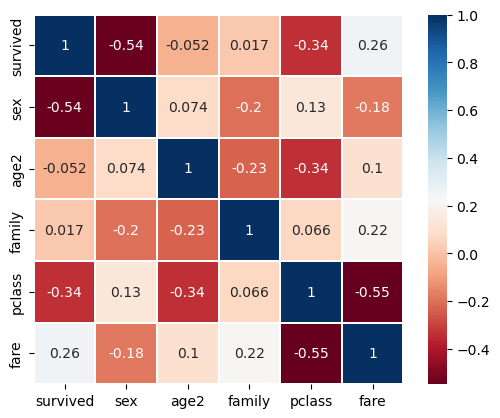

In [113]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, 
            cmap = colormap, linecolor = 'white', annot = True,annot_kws = {"size": 10})

plt.show()